In [94]:
# 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl

# 글꼴 깨짐 방지
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] =False

# 데이터 프레임 
df = pd.read_csv("/Users/b26/Desktop/미니프로젝트/패스트캠퍼스 데이터분석/실습데이터.csv")

#MeCab 사용
from konlpy.tag import Mecab
from PIL import Image
import nltk
import os
import re

# Word Cloud
from wordcloud import WordCloud



In [95]:
df.corr(numeric_only=True)

,거래id,고객id,코스ID,실거래금액
거래id,1.000000,0.000515,0.450603,0.028538
고객id,0.000515,1.000000,-0.000818,-0.001384
코스ID,0.450603,-0.000818,1.000000,0.017964
실거래금액,0.028538,-0.001384,0.017964,1.000000


In [96]:
df['거래금액'] = pd.to_numeric(df['거래금액'], errors='coerce').fillna(0)


In [97]:
df['코스ID'].nunique()

407

In [98]:
df['코스(상품) 이름'].nunique()

407

In [99]:
# 상품 별 판매량 파악

df_course = df.groupby('코스ID')['거래금액']

In [100]:
df_course = df_course.sum().reset_index()

In [101]:
df_course = df_course.sort_values(by='거래금액' , ascending=False)

In [102]:
df_course

,코스ID,거래금액
82,203720,433555600.0
354,212600,408904500.0
195,207343,399489400.0
239,208963,392779760.0
71,203525,389668500.0
...,...,...
10,201849,0.0
47,202883,0.0
390,213848,0.0
1,2600,0.0


In [103]:
df_course.head(5)

,코스ID,거래금액
82,203720,433555600.0
354,212600,408904500.0
195,207343,399489400.0
239,208963,392779760.0
71,203525,389668500.0


In [104]:
df_course.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 82 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   코스ID    407 non-null    int64  
 1   거래금액    407 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   거래id       159328 non-null  int64  
 1   유형         159328 non-null  object 
 2   고객id       159328 non-null  int64  
 3   코스ID       159328 non-null  int64  
 4   사이트        159328 non-null  object 
 5   포맷         159328 non-null  object 
 6   카테고리       159328 non-null  object 
 7   코스(상품) 이름  159328 non-null  object 
 8   거래일자       159328 non-null  object 
 9   쿠폰이름       159328 non-null  object 
 10  판매가격       159328 non-null  object 
 11  결제수단       159328 non-null  object 
 12  실거래금액      159328 non-null  int64  
 13  쿠폰할인액      159328 non-null  object 
 14  거래금액       159328 non-null  float64
 15  환불금액       159328 non-null  object 
dtypes: float64(1), int64(4), object(11)
memory usage: 19.4+ MB


In [106]:
# 코스ID와 코스(상품) 이름으로 그룹화하고 거래금액의 합계를 계산
grouped_df = df.groupby(['코스ID', '코스(상품) 이름'], as_index=False).agg({'거래금액': 'sum'})

print(grouped_df)

       코스ID                                 코스(상품) 이름        거래금액
0      2204                           올인원 패키지 : 디자인 툴         0.0
1      2600                      올인원 패키지 : 앱/웹 서비스 기획         0.0
2    200260                 올인원 패키지 : 스타트업 투자유치&벤처 투자  48965600.0
3    200399                  올인원 패키지 : 리더를 위한 HR/인재경영  18148500.0
4    201408                       올인원 패키지 : 엑셀 실무 마스터         0.0
..      ...                                       ...         ...
402  214496                 초격차 패키지 : 한 번에 끝내는 자연어 처리   8575000.0
403  214558  [Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지   4535200.0
404  214561     [무료 강의] Solana&Rust 블록체인 개발 아카데미 Lv.1   1090000.0
405  214833       네오아카데미 : 후와리의 스토리가 느껴지는 라이트 노벨 일러스트  12846500.0
406  214834           네오아카데미: 오카즈의 판타지 세계관 게임 캐릭터 디자인   5074000.0

[407 rows x 3 columns]


In [107]:
grouped_df = grouped_df.sort_values(by='거래금액' , ascending=False)

In [108]:
grouped_df

,코스ID,코스(상품) 이름,거래금액
82,203720,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,433555600.0
354,212600,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,408904500.0
195,207343,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,399489400.0
239,208963,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,392779760.0
71,203525,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,389668500.0
...,...,...,...
10,201849,올인원 패키지 : 그로스 마케팅,0.0
47,202883,올인원 패키지 : 디지털 마케팅 MAX 2020,0.0
390,213848,test_qa,0.0
1,2600,올인원 패키지 : 앱/웹 서비스 기획,0.0


In [109]:
grouped_df.head(50)

,코스ID,코스(상품) 이름,거래금액
82,203720,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,433555600.0
354,212600,네오아카데미 : 완케의 악마와 계약하는 초단기 일러스트 성장법,408904500.0
195,207343,올인원 패키지 : 스프링의 정석 : 남궁성과 끝까지 간다,399489400.0
239,208963,초격차 패키지: Kubernetes와 Docker로 한 번에 끝내는 컨테이너 기반 MSA,392779760.0
71,203525,초격차 패키지 : 한 번에 끝내는 Java/Spring 웹 개발 마스터,389668500.0
310,211368,초격차 패키지 : 10개 프로젝트로 완성하는 백엔드 웹개발(Java/Spring),362815200.0
107,204373,초격차 패키지 : 일잘러 필수 스킬 모음.zip,330366105.0
283,210664,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,298716750.0
194,207161,편집하는여자의 영상편집 마스터클래스 - 제 3강 디테일한 이펙트로 완성하는 프리미어,292914900.0
70,203523,초격차 패키지 : 한번에 끝내는 UX/UI 디자인,287574550.0


In [110]:
mecab = Mecab()

In [111]:
# 위 데이터로 키워드 추출 해보기

In [112]:
FEATURE_POS = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR',
               'NP', 'VV', 'VA', 'MAG'] 
#mecab 기준, 명사 & 형용사 & 동사 & 부사


def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 패턴.
    # doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    
    # 특수문자를 제거하는 패턴.
    doc = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", " ", doc)
    # e.g. codingiscoffee@gmail.com 을 고려해서 " "로 했음
    
    # 영문 빼고 모두 제거하는 패턴.
    #doc = doc.replace("\n", " ")
    #doc = re.sub("[^A-Za-z ]", "", doc)
    
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    SW.add("있어요")
    SW.add("대한")
    SW.add("합니다")
    SW.add("하는")
    SW.add("보다")
    SW.add("한다")
    SW.add("가능")
    SW.add("초격차")
    SW.add("올인원")
    SW.add("패키지")
    SW.add("격차")
    SW.add("끝내")
    SW.add("배우")
    SW.add("끝내")

    
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word.strip())
            
    return SW

def text_tokenizing(doc, tokenizer):
    """
    Input Parameter :
    
    doc - tokenizing 하는 실제 데이터
    tokenizer - token의 단위.
    """
    tok = mecab  # 형태소 분석기 선언.
    
    
    if tokenizer == "words":
        return [word for word in doc.split() if word not in SW and len(word) > 1]
    
    elif tokenizer == "nouns":
        # 명사만 뽑아주는 함수 .nouns --> return []
        return [token for token in tok.nouns(doc) if token not in SW and len(token) > 1]
        
    elif tokenizer == "morphs":
        # 형태소로 나눔
        return [token for token in tok.morphs(doc) if token not in SW and len(token) > 1]    
    
    elif tokenizer == "predefined":
        
        documents = []
        text_pos = [pair for pair in tok.pos(doc) if pair[0] not in SW and len(pair[0]) > 1]
        words = []

        for word, pos in text_pos:
            if pos in FEATURE_POS:
                words.append(word)

        return words

In [113]:
tokenizer = "predefined"

In [114]:
SW = define_stopwords("./stopwords-ko.txt")

In [115]:
document = grouped_df
documents = document["코스(상품) 이름"]  # 
# cleaned_docs = text_cleaning(documents)
# tokenized_docs = text_tokenizing(cleaned_docs)
tokenized_documents = documents.apply(text_cleaning)\
                                .apply(lambda x : text_tokenizing(x,tokenizer))
#   .apply(func=text_tokenizing, tokenizer = tokenizer)
# 2D list
# tokenized_docs = documents.apply(text_cleaning)\
                # .apply(lambda x : text_tokenizing(x,tokenizer))

tokenized_documents

82                          [프론트엔드, 개발]
354    [네오, 아카데미, 악마, 계약, 단기, 일러스트, 장법]
195                       [스프링, 정석, 남궁]
239                          [컨테이너, 기반]
71                            [개발, 마스터]
                     ...               
10                           [그로스, 마케팅]
47                           [디지털, 마케팅]
390                                  []
1                             [서비스, 기획]
0                                 [디자인]
Name: 코스(상품) 이름, Length: 407, dtype: object

# TF-IDF 알고리즘을 적용하여 키워드 추출

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#TfidfVectorizer의 input으로 만들기 위한 전처리.
tfidf_docs = [" ".join(L) for L in tokenized_documents]

tfidf = TfidfVectorizer()
# X_tfidf.toarray()  #numpy array 로 변환해줌

# tfidf Document-Term Matrix로 변환
X_tfidf = tfidf.fit_transform(tfidf_docs)

terms = tfidf.get_feature_names()  # 사전(가나다)순으로 정렬.

tfidf_df = pd.DataFrame(data = X_tfidf.toarray(),
                        columns=terms)

display(tfidf_df)

# sum tfidf frequency of each term through documents
sums = X_tfidf.sum(axis=0) ##mean(=sum)   vs max

# connecting term to its sums frequency
df = []
for col, term in enumerate(terms):
    df.append( (term, sums[0,col] ))

ranking = pd.DataFrame(df, columns=['Term','TF-IDF'])
rankInfo = ranking.sort_values('TF-IDF', ascending=False)[:50]

x = list(rankInfo["Term"])
y = list(rankInfo["TF-IDF"])

tfidfInfo = dict()

for vocab, tfidf in zip(x, y):
    tfidfInfo[vocab] = tfidf

print(x[:5])
print(y[:5])
print()
print(rankInfo)

/opt/homebrew/Caskroom/miniconda/base/envs/test/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,가득,가볍,가이드,가장,가지,가치,감각,감독,감성,감지,...,활용,황선미,회계,회계사,회사,회수,효과,효율,후디니,히어로
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


['개발', '데이터', '디자인', '프로젝트', '활용']
[13.755586912348289, 13.19591977597992, 12.078976939328431, 11.09469007020923, 10.355749111850248]

      Term     TF-IDF
14      개발  13.755587
117    데이터  13.195920
132    디자인  12.078977
643   프로젝트  11.094690
679     활용  10.355749
140     러닝  10.332743
342     실무  10.310969
232     분석   9.146966
354   아카데미   7.868064
229    부동산   7.175382
160    마스터   6.990906
611    파이썬   6.657230
406     완성   6.325226
518     제작   6.164177
569    캐릭터   5.849391
162    마케팅   5.738705
467   일러스트   5.682535
396     영상   5.486783
626     편집   5.124083
509     정복   4.961156
644  프론트엔드   4.741804
47      구현   4.717184
547     처리   4.655395
164     만드   4.597549
407     완전   4.543163
129    디벨로   4.281830
382     엑셀   4.192621
46      구축   4.169423
54     그래픽   4.049669
333     시작   4.045851
24      게임   3.937270
499     전략   3.899430
599     투자   3.869086
171     머신   3.860463
181     모션   3.759369
432    유치원   3.667927
471     입문   3.620098
276    서비스   3.431555
61     

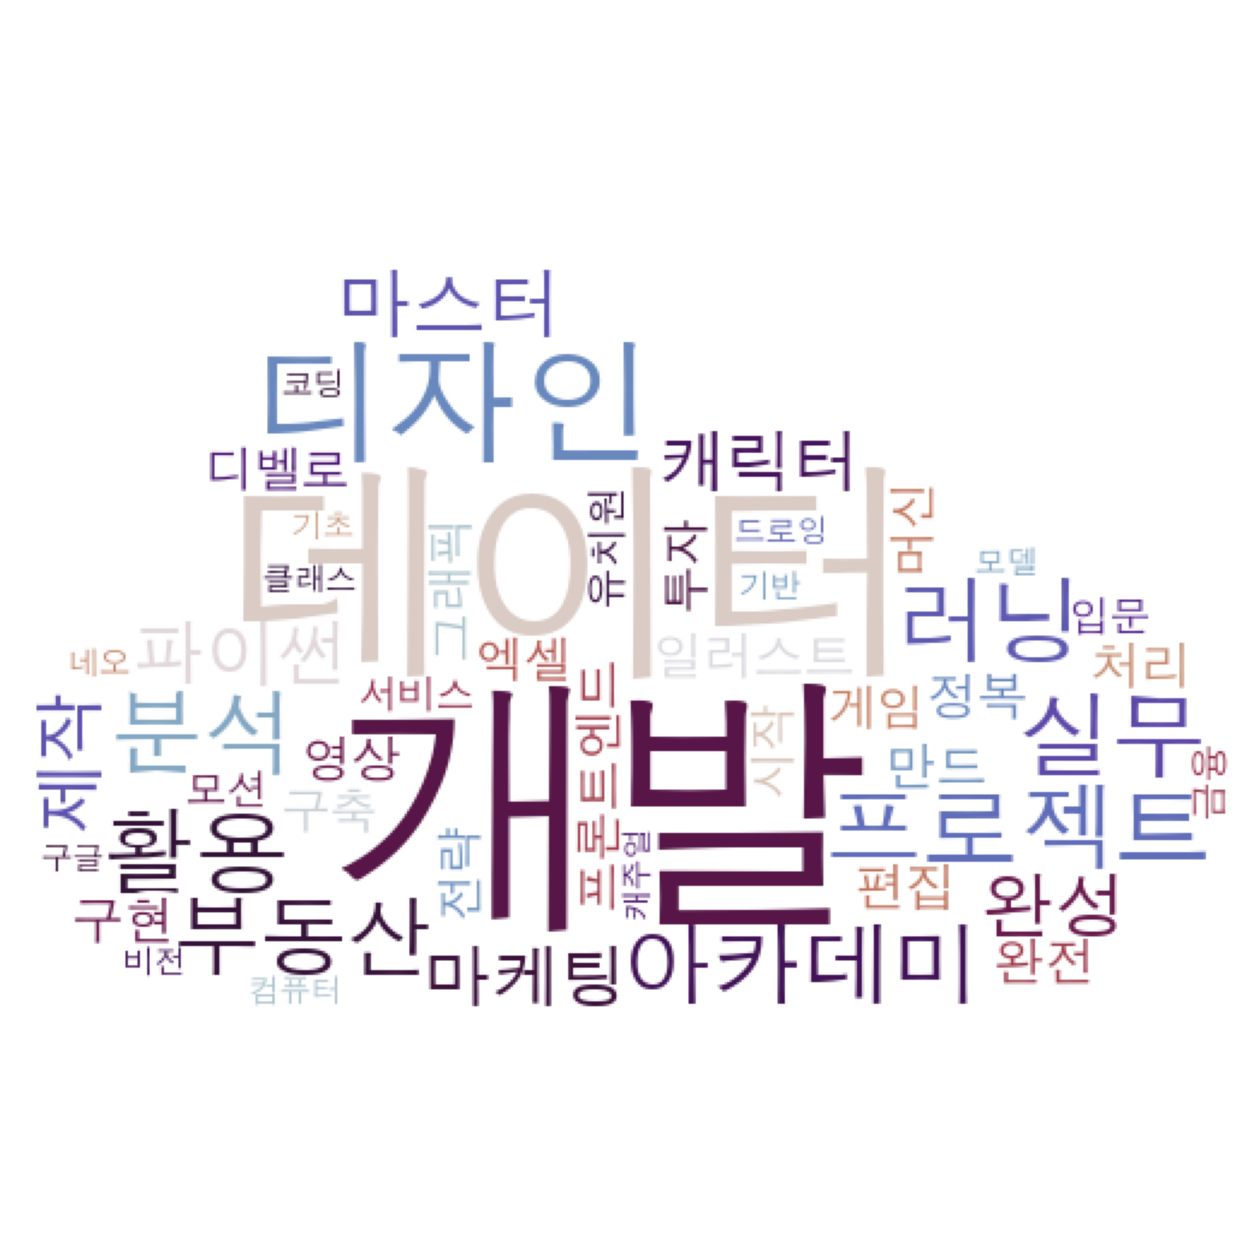

In [117]:
### 워드클라우드에 들어갈 단어 갯수 변경.

# for windows : font_path='c:/Windows/Fonts/malgun.ttf'
# for macOS : font_path = "/usr/share/fonts/nanumfont/NanumGothic.ttf"

# 워드클라우드 만들 배경 그림 경로. ex) cloud.png

mask = np.array(Image.open("./cloud.png"))
wordcloud = WordCloud(font_path = "AppleGothic",
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      mask=mask,
                      background_color='white',
                      colormap="twilight"
                      ).generate_from_frequencies(tfidfInfo)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./wordcloud_naverNews(tfidf).png")
plt.show()

# 패스트 캠퍼스에서 위 Word Cloud 를 통해 어떤 강의들을 늘려나가야할까?
# 데이터 / 개발 관련 / 디자인 / 부동산 